 In the context of feature engineering for prediction, you could think of an unsupervised algorithm as a "feature discovery" technique.
 
 `Clustering` simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithm makes "birds of a feather flock together," so to speak.
 
 ### k-Means Clustering
 `K-means` clustering measures similarity using ordinary straight-line distance (Euclidean distance, in other words). It creates clusters by placing a number of points, called centroids, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The "k" in "k-means" is how many centroids (that is, clusters) it creates.
 
 Each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a `Voronoi tessallation`. The tessallation shows to what clusters future data will be assigned; the tessallation is essentially what k-means learns from its training data.
 
 It's a simple two-step process. The algorithm starts by randomly initializing some predefined number (`n_clusters`) of centroids. It then iterates over these two operations:

1. assign points to the nearest cluster centroid
2. move each centroid to minimize the distance to its points

It iterates over these two steps until the centroids aren't moving anymore, or until some maximum number of iterations has passed (`max_iter`).

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times (`n_init`) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.

**For better performance** increase the `max_iter` for a large number of clusters or `n_init` for a complex dataset. Ordinarily though the only parameter we'll need to choose yourself is n_clusters (k, that is). The best partitioning for a set of features depends on the model we're using and what we're trying to predict, so it's best to tune it like any hyperparameter (through cross-validation).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
df = pd.read_csv("Datasets/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

## Elbow Method
##### Find optimum number of cluster

In [3]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, n_init=10,random_state=2)
    
    km.fit(X)
    sse.append(km.inertia_)

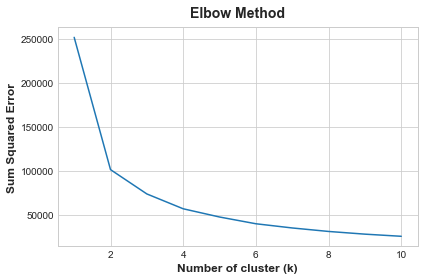

In [4]:
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')

plt.show()

### Create cluster feature
 n = 6

In [5]:
kmeans = KMeans(n_clusters=6,n_init=25, random_state=2)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,3


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

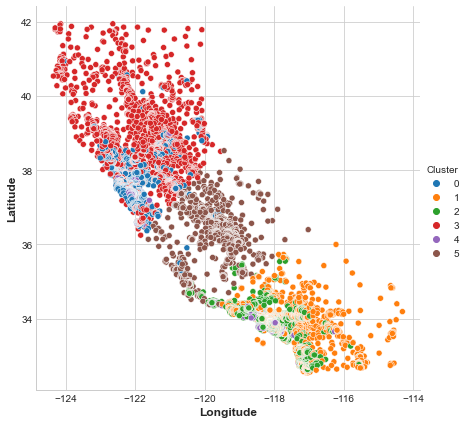

In [6]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=X, height=6)
plt.show()

The target in this dataset is `MedHouseVal` (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across `MedHouseVal`

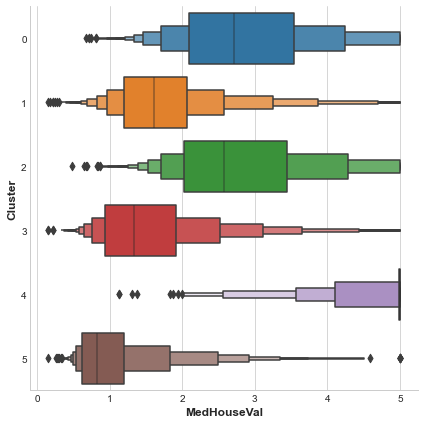

In [7]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6)
plt.show()